In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, random
path = 'drive/My Drive/images_fer2013'  
os.chdir(path)

In [ ]:
ls

models/       PublicTest_csv/     TestingImages_csv/     Training_csv/
PrivateTest/  PublicTest_csv.csv  TestingImages_csv.csv  Training_csv.csv
PublicTest/   TestingImages/      Training/


In [ ]:
#!unzip images_fer2013.zip

In [ ]:
# IMPORTING LIBRARIES

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import *
from torch.utils.data import dataset, dataloader, ConcatDataset
import copy
from shutil import copy
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL as Image         
 
from sklearn.utils import shuffle
from random import shuffle 
from shutil import copyfile
%matplotlib inline

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    
seed_everything(602)

In [ ]:
# DEFINING THE DIRECTORIES

path ='./'       
train = 'Training'
test = 'PublicTest'     

In [ ]:
## CONVERTING THE IMAGES TO CSV

# columns = ['id','label']       
# df_train = pd.DataFrame(columns=columns)
# df_test = pd.DataFrame(columns=columns)

# # Train
# if not os.path.exists(path + 'Training_csv'):
#         os.makedirs(path + 'Training_csv')
        
# count = 0
# for class_name in os.listdir(train):
#     class_path = os.path.join(train, class_name)
#     for image_name in os.listdir(class_path):
#         image_path = os.path.join(class_path, image_name)
#         df_train.loc[count] = [image_name] + [class_name]
#         copy(image_path, path + 'Training_csv')
#         count += 1

# # Test
# if not os.path.exists(path + 'PublicTest_csv'):
#         os.makedirs(path + 'PublicTest_csv')
        
# count = 0
# for class_name in os.listdir(test):
#     class_path = os.path.join(test, class_name)
#     for image_name in os.listdir(class_path):
#         image_path = os.path.join(class_path, image_name)
#         df_test.loc[count] = [image_name] + [class_name]
#         copy(image_path, path + 'PublicTest_csv')
#         count += 1


# # Save DataFrames


In [ ]:
# df_train = df_train.sample(frac=1).reset_index(drop=True)
# df_test = df_test.sample(frac=1).reset_index(drop=True)

# df_train.to_csv(path + "Training_csv.csv", index=False)
# df_test.to_csv(path + "PublicTest_csv.csv", index=False)

**DATA PROCESSING**

In [ ]:
# READING THE DATA

train = './Training_csv'
test = './PublicTest_csv' 

train_csv = './Training_csv.csv'
test_csv = './PublicTest_csv.csv'
  
df_train = pd.read_csv(train_csv)
df_test = pd.read_csv(test_csv)
df_train.head()

id    label
0  18901.jpg    Happy
1  16255.jpg    Happy
2   4057.jpg  Neutral
3  11300.jpg    Happy
4  19501.jpg      Sad

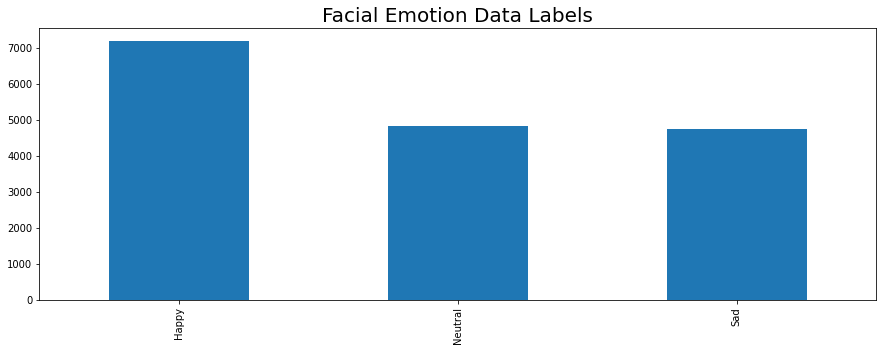

In [ ]:
# VISUALIZING THE DATA LABELS

import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 5)
df_train['label'].value_counts().plot(kind = 'bar')
plt.title('Facial Emotion Data Labels', fontsize = 20)
plt.show()

Next: Try out some visualizations with charts maybe barplots to show that the three classes have almost equal number of data. Before proceeding to fastai

In [ ]:
# IMPORTING fastai

from fastai.vision import *

In [ ]:
# !mkdir SingleTrain
# !cp Training/Happy/* SingleTrain
# !cp Training/Sad/* SingleTrain
# !cp Training/Neutral/* SingleTrain

**LOADING THE DATA**

In [ ]:
# DEFINING THE TRANSFORMS
transform = get_transforms(do_flip = True, flip_vert = False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, 
                           max_warp=0.2, p_affine=0.75, p_lighting=0.75)

# LOADING THE TRAINING DATA AND SPLITTING IT FOR VALIDATION 
data = (ImageList.from_df(df_train, path, folder=train).split_by_rand_pct(0.15).label_from_df().transform(transform, size = 48).databunch(bs=16, num_workers = 4))

In [ ]:
# DATA NORMALIZATION

data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (14239 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
Happy,Happy,Neutral,Sad,Neutral
Path: .;

Valid: LabelList (2512 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
Sad,Sad,Happy,Happy,Happy
Path: .;

Test: None

In [ ]:
data.classes

['Happy', 'Neutral', 'Sad']

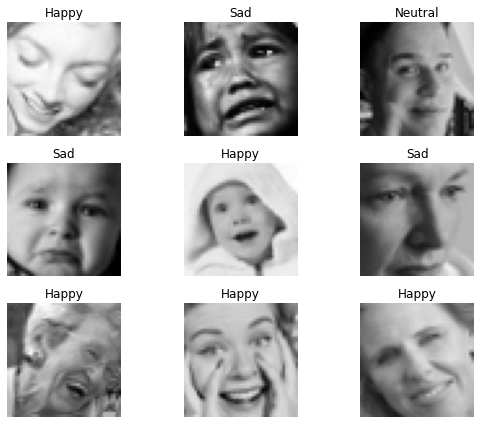

In [ ]:
# DISPLAYING SOME OF THE IMAGES

data.show_batch(rows = 3, figsize = (8,6))

In [ ]:
# INSTALLING PRETRAINED MODELS

pip install pretrainedmodels

In [ ]:
# import pretrainedmodels
# def pretrained_model(pretrained = True):
#    return pretrainedmodels.resnet18(num_classes = 1000, pretrained = 'imagenet')

In [ ]:
class Callback():
    def __init__(self):pass
    def on_train_begin(self, **kwargs:Any):pass
    def on_epoch_begin(self, **kwargs:Any):pass
    def on_batch_begin(self, **kwargs:Any):pass
    def on_loss_begin(self, **kwargs:Any):pass
    def on_backward_begin(self, **kwargs:Any):pass
    def on_backward_end(self, **kwargs:Any):pass
    def on_step_end(self, **kwargs:Any):pass
    def on_batch_end(self, **kwargs:Any):pass
    def on_epoch_end(self, **kwargs:Any):pass
    def on_train_end(self, **kwargs:Any):pass
    def get_state(self, minimal = True):pass

In [ ]:
class EarlyStopping(Callback):
 
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
 
    # def on_epoch_end(self, last_metrics, **kwargs):
    #     # if the monitored metrics got worst set a flag to stop training
    #     if some_fct(last_metrics): return {'stop_training': True}
 
    def __call__(self, val_loss, model):
 
        score = -val_loss
 
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0
 
    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), "models/"+f"base_fer_model2.pt")
        self.val_loss_min = val_loss

**DEFINING/TRAINING THE MODEL**

In [ ]:
## USING VGG19_BN MODEL

learn = cnn_learner(data=data,base_arch= models.vgg19_bn,cut=-2, 
                   metrics=[accuracy, error_rate], 
                   model_dir='models')
callbacks = [EarlyStopping(learn)]
learn.callbacks = callbacks

In [ ]:
# LEARNING RATE FINDER

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


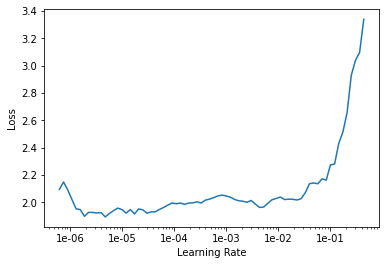

In [ ]:
learn.recorder.plot()

In [ ]:
## TRAINING THE MODEL (vgg19_bn)

learn.unfreeze()
lr = 1e-5
learn.fit_one_cycle(20, lr)  

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f724af66cc0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f724af66cc0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/l

In [ ]:
# SAVING THE MODEL

#learn.save('base_fer_model') --> resnet18
learn.save('base_fer_model2') # --> vgg19_bn

In [ ]:
#learn = learn.load('base_fer_model')

In [ ]:
#learn.export()

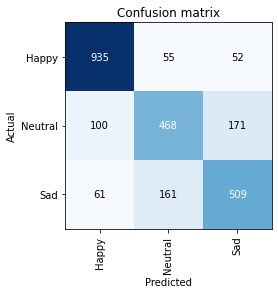

In [ ]:
# PLOTTING A CONFUSION MATRIX

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

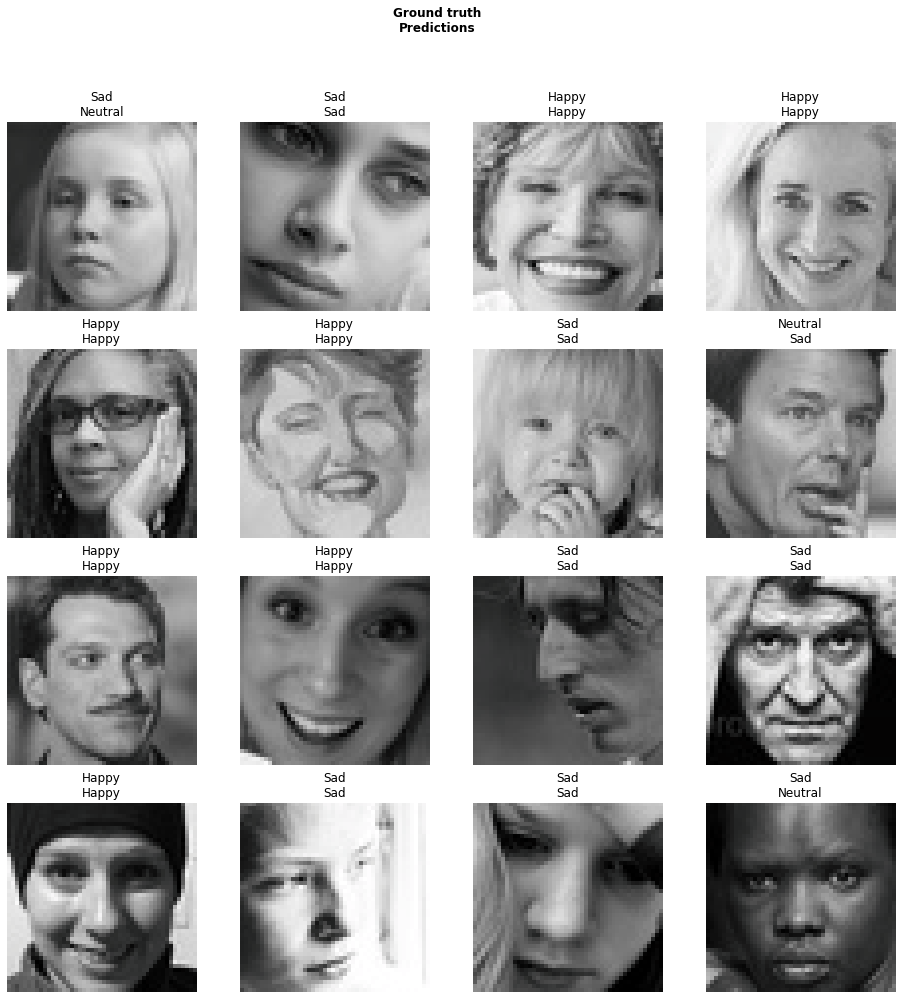

In [ ]:
# DISPLAYING THE MODEL'S PREDICTIONS FOR THE VALIDATION DATA

learn.get_preds(ds_type= DatasetType.Valid)
learn.show_results(ds_type= DatasetType.Valid)

**LOADING THE TEST DATA**

In [ ]:
data = (ImageList.from_df(df_test, path, folder=test).split_none()
        .label_from_df().transform(transform, size = 48).databunch(bs=16, num_workers = 4))
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1861 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
Neutral,Happy,Neutral,Neutral,Sad
Path: .;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: .;

Test: None

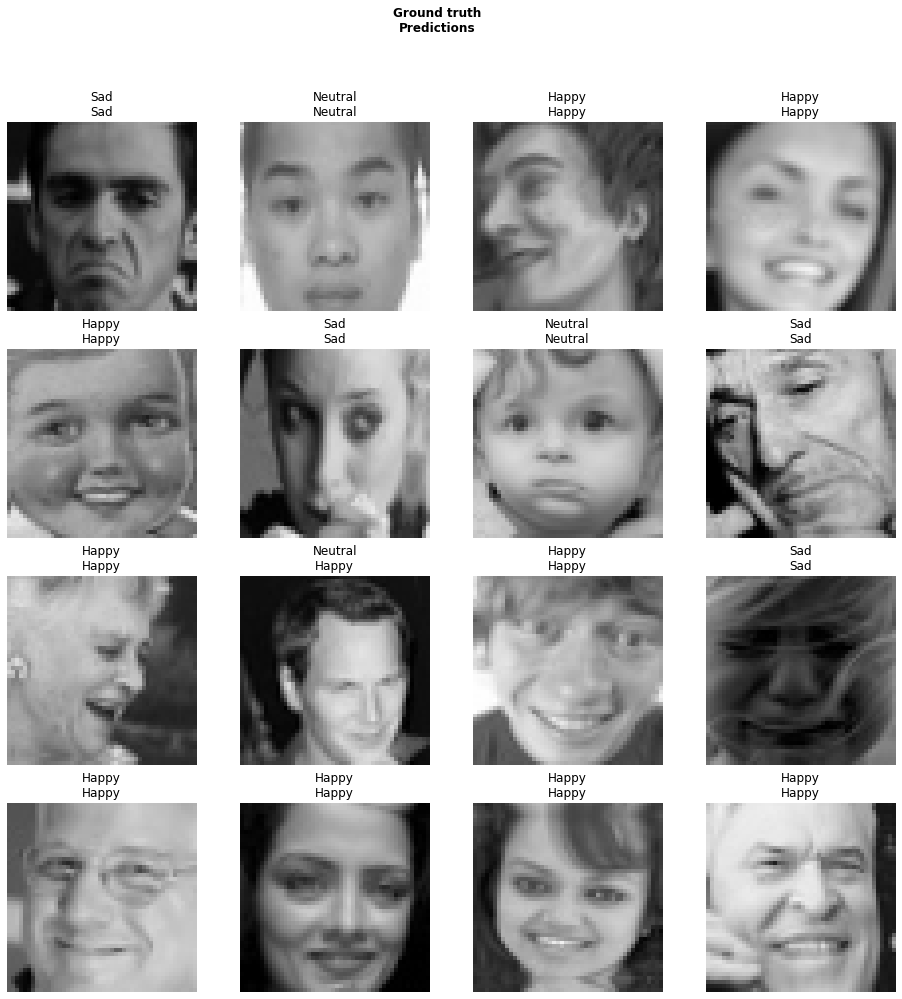

In [ ]:
# DISPLAYING THE MODEL'S PREDICTIONS FOR THE TEST DATA

learn.data.valid_dl = data.train_dl
p,t = learn.get_preds()
learn.show_results()

In [ ]:
p

tensor([[0.9915, 0.0017, 0.0068],
        [0.6101, 0.2259, 0.1640],
        [0.0109, 0.4990, 0.4901],
        ...,
        [0.1676, 0.6090, 0.2234],
        [0.0139, 0.6849, 0.3013],
        [0.0352, 0.6540, 0.3108]])

In [ ]:
t

tensor([0, 0, 1,  ..., 1, 2, 1])

**TESTING THE MODEL ON REAL IMAGES** 

In [ ]:
my_test = 'TestingImages'

# columns = ['id','label']       

# df_my_test = pd.DataFrame(columns=columns)

# # Test
# if not os.path.exists(path + 'TestingImages_csv'):
#         os.makedirs(path + 'TestingImages_csv')
        
# count = 0
# for class_name in os.listdir(my_test):
#     class_path = os.path.join(my_test, class_name)
#     for image_name in os.listdir(class_path):
#         image_path = os.path.join(class_path, image_name)
#         df_my_test.loc[count] = [image_name] + [class_name]
#         copy(image_path, path + 'TestingImages_csv')
#         count += 1

# df_my_test = df_my_test.sample(frac=1).reset_index(drop=True)
# df_my_test.to_csv(path + "TestingImages_csv.csv", index=False)


In [ ]:
ls

models/       PublicTest_csv/     TestingImages_csv/     Training_csv/
PrivateTest/  PublicTest_csv.csv  TestingImages_csv.csv  Training_csv.csv
PublicTest/   TestingImages/      Training/


In [ ]:
my_test = './TestingImages_csv' 

my_test_csv = './TestingImages_csv.csv'
  
df_my_test = pd.read_csv(my_test_csv)
print(df_my_test)

        id    label
0  003.jpg  Neutral
1  001.jpg    Happy
2  002.jpg    Happy


In [ ]:
transform = get_transforms(do_flip = True, flip_vert = False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, 
                           max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=zoom_crop(scale=(0.75,2), do_rand=True))
il = ImageList.from_df(df_my_test, path, folder = my_test).split_none()
ll = il.label_from_df(cols='label').transform(transform, size = 224) 
data = ll.databunch(bs = 3)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

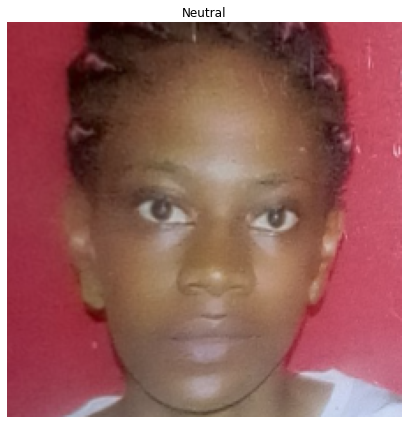

In [ ]:
data.show_batch(rows= 1, figsize =(8,6))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

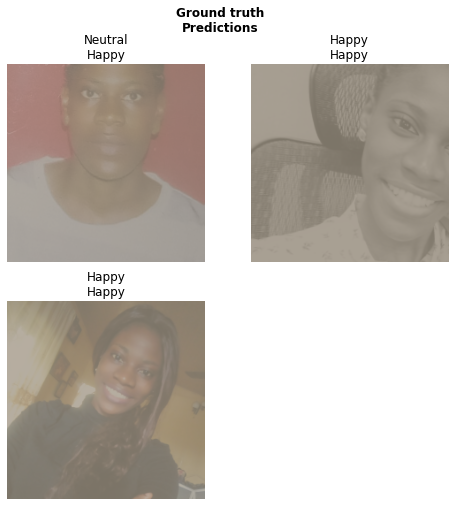

In [ ]:
learn.data.valid_dl = data.train_dl
learn.get_preds()
learn.show_results()